In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# Read in the dataset:

In [2]:
train_df = pd.read_csv("../datasets/train.csv")
test_df = pd.read_csv("../datasets/test.csv")

# Investigate the data:

### "Train" dataset:

In [3]:
train_df.shape

(2051, 81)

In [4]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### "Test" dataset:

In [6]:
test_df.shape

(878, 80)

In [7]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

# Clean the data:

***Format the Column Names:***

In [9]:
def format_col(df):
    # To lowercase
    df.columns = map(str.lower, df.columns)  # <-- Referenced: https://chrisalbon.com/python/data_wrangling/pandas_lowercase_column_names/
    
    # Remove spaces, add "_":
    df.columns = df.columns.str.replace(" ", "_")
    
    
format_col(train_df)
format_col(test_df)

train_df.rename(columns={"saleprice": "sale_price"}, inplace=True)

### NaN's

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

***total bsmt df col***
- Or, drop the 1 nan value in the col, and use that data (to indicate if has a basement, or create a has bsmt/ does not col)

In [11]:
# Total bsmt sq feet
# print(train_df.loc[train_df["total_bsmt_sf"].isna()])  # row 1327
train_df["total_bsmt_sf"].isna().sum()
train_df["total_bsmt_sf"].value_counts()
train_df.dropna(axis=0, subset=["total_bsmt_sf"], inplace=True)
# train_df[train_df["total_bsmt_sf"].dropna(inplace=True)]

***garage cols***

In [12]:
train_df.dropna(axis=0, subset=["garage_area"], inplace=True)
train_df["garage_area"].isna().sum()

0

# Feature Engineering

### Create Age of House Column.
- From the heatmaps and correlations charted above, we have reason to believe that the year a house was built could strongly correlate to the sale price of the house. Below we'll engineer a new "house_age" column to store the ages of the houses.
- This will be age of the house at the time for the year when it was built.
    - Therefore, will be equal to year sold - year built
- As the year of that the unit was built increases, the build year *seems* to have a positive linear relationship with the sale price of the unit.
    - Inversely, as the age (build year - year of sale) increases, the age *seems* to have a negative linear relationship with the sale price of the unit.

In [13]:
def parcel_age(df):
    df["parcel_age"] = df["yr_sold"] - df["year_built"]
    return df

In [14]:
parcel_age(train_df)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price,parcel_age
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,34
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,13
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,57
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,4
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2008,WD,298751,1
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2009,WD,82500,69
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,3,2009,WD,177000,81
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2009,WD,144000,53


In [15]:
parcel_age(test_df)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,parcel_age
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,96
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,29
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,84
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,33
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,42
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,40
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,36


### Save the Clean CSV:

In [16]:
train_df.to_csv("../datasets/clean_train.csv")

In [17]:
test_df.to_csv("../datasets/clean_test.csv")

# EDA

In [31]:
train_df.corr()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_price,parcel_age
id,1.000000,0.174079,0.015617,-0.025046,0.017476,-0.073698,-0.019703,-0.068530,-0.098778,-0.031920,...,-0.009969,0.030858,-0.022579,0.017532,0.050158,-0.009421,0.142413,-0.976502,-0.066907,0.027443
pid,0.174079,1.000000,-0.006286,-0.092179,-0.023999,-0.284766,0.127259,-0.360647,-0.187431,-0.280807,...,-0.071447,0.160562,-0.025006,-0.058142,-0.005532,0.008861,-0.025428,0.006466,-0.280854,0.360577
ms_subclass,0.015617,-0.006286,1.000000,-0.387369,-0.297498,0.013557,-0.064425,0.013655,0.019393,-0.001627,...,-0.016064,-0.038279,-0.018766,-0.039948,-0.012433,-0.034841,0.011160,-0.023319,-0.100882,-0.014622
lot_frontage,-0.025046,-0.092179,-0.387369,1.000000,0.576321,0.195139,-0.056198,0.108623,0.084385,0.219682,...,0.178528,0.001627,0.032499,0.076585,0.158004,0.052411,-0.021800,0.009538,0.340194,-0.108120
lot_area,0.017476,-0.023999,-0.297498,0.576321,1.000000,0.186131,-0.061251,0.093668,0.092447,0.191911,...,0.164461,-0.010239,0.006388,0.116727,0.175119,0.125550,0.011659,-0.023358,0.381496,-0.094561
overall_qual,-0.073698,-0.284766,0.013557,0.195139,0.186131,1.000000,-0.100554,0.612448,0.594022,0.462101,...,0.317699,-0.183626,0.025444,0.060597,0.009287,0.031697,0.007056,-0.004353,0.811789,-0.612052
overall_cond,-0.019703,0.127259,-0.064425,-0.056198,-0.061251,-0.100554,1.000000,-0.383531,0.036613,-0.151080,...,-0.060052,0.116536,-0.007564,0.052086,-0.022270,0.011981,-0.010578,0.044578,-0.121103,0.385041
year_built,-0.068530,-0.360647,0.013655,0.108623,0.093668,0.612448,-0.383531,1.000000,0.626505,0.353761,...,0.210399,-0.397663,0.018741,-0.037309,0.008716,-0.000700,-0.015817,-0.001491,0.580213,-0.999117
year_remod/add,-0.098778,-0.187431,0.019393,0.084385,0.092447,0.594022,0.036613,0.626505,1.000000,0.235339,...,0.279179,-0.248035,0.031524,-0.036320,-0.016483,-0.003618,0.007181,0.047500,0.556780,-0.623918
mas_vnr_area,-0.031920,-0.280807,-0.001627,0.219682,0.191911,0.462101,-0.151080,0.353761,0.235339,1.000000,...,0.157446,-0.119639,0.010723,0.092557,0.022468,0.093587,0.005348,-0.029671,0.541138,-0.354673


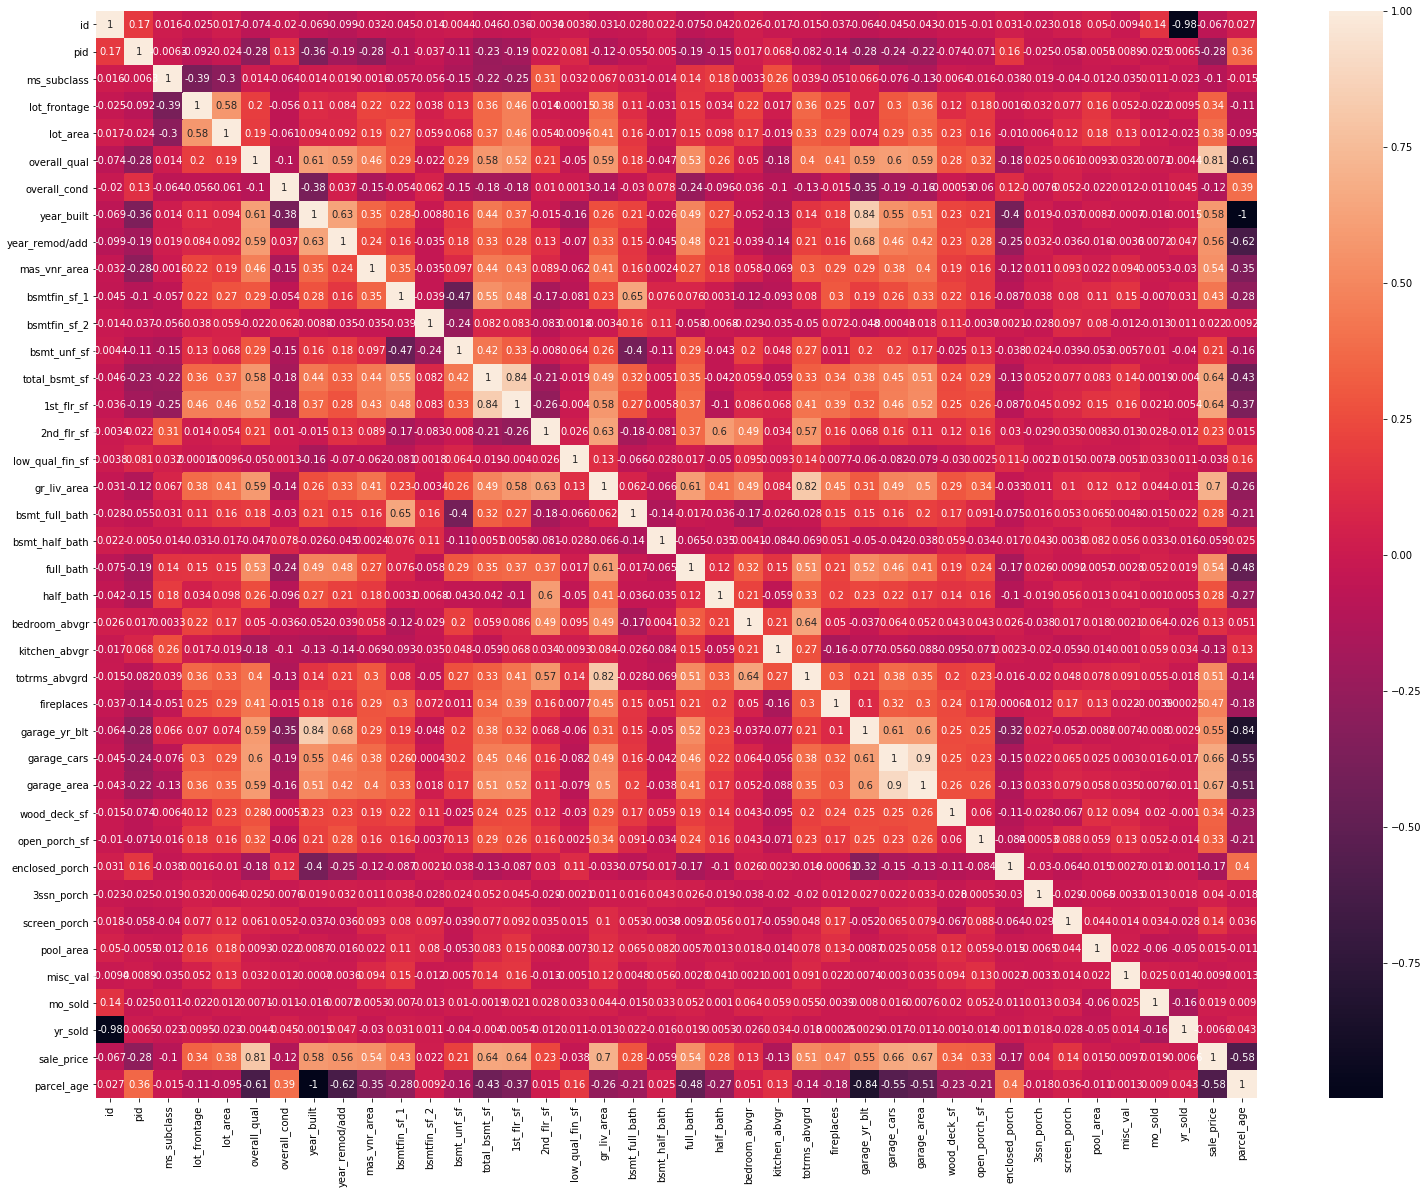

In [32]:
plt.figure(figsize=(26, 20))

sns.heatmap(train_df.corr(),
            annot=True);

In [33]:
train_df.corr()[["sale_price"]]

,sale_price
id,-0.066907
pid,-0.280854
ms_subclass,-0.100882
lot_frontage,0.340194
lot_area,0.381496
overall_qual,0.811789
overall_cond,-0.121103
year_built,0.580213
year_remod/add,0.556780
mas_vnr_area,0.541138


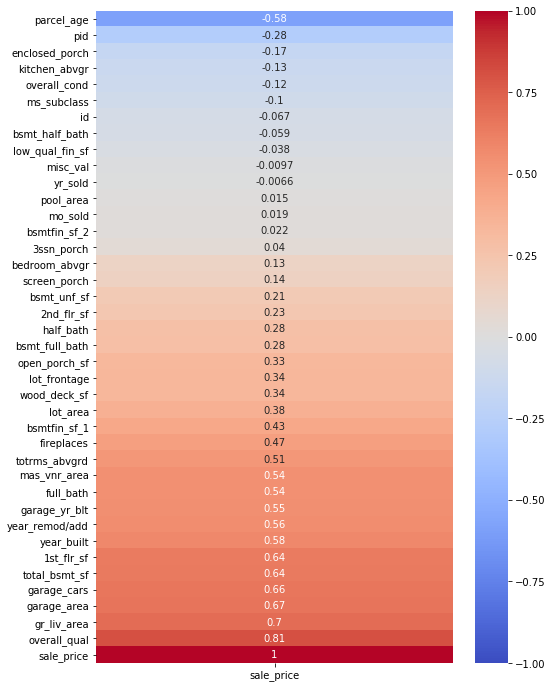

In [34]:
# Heatmap - credit instructor Riley D. from lecture 3.07
plt.figure(figsize=(8, 12))

sns.heatmap(train_df.corr()[["sale_price"]].sort_values("sale_price"),
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1);


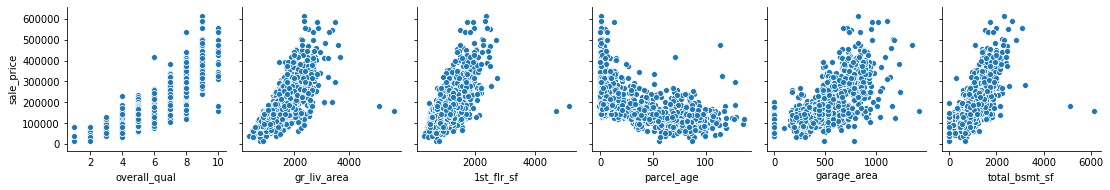

In [36]:
# Pairplots of the top 5 highest corr from heatmap above (less bsmt and garage cols):
sns.pairplot(train_df,
             x_vars=["overall_qual",
                     "gr_liv_area",
                     "1st_flr_sf",
                     "parcel_age",
                     "garage_area",
                     "total_bsmt_sf"],
             y_vars=["sale_price"]);

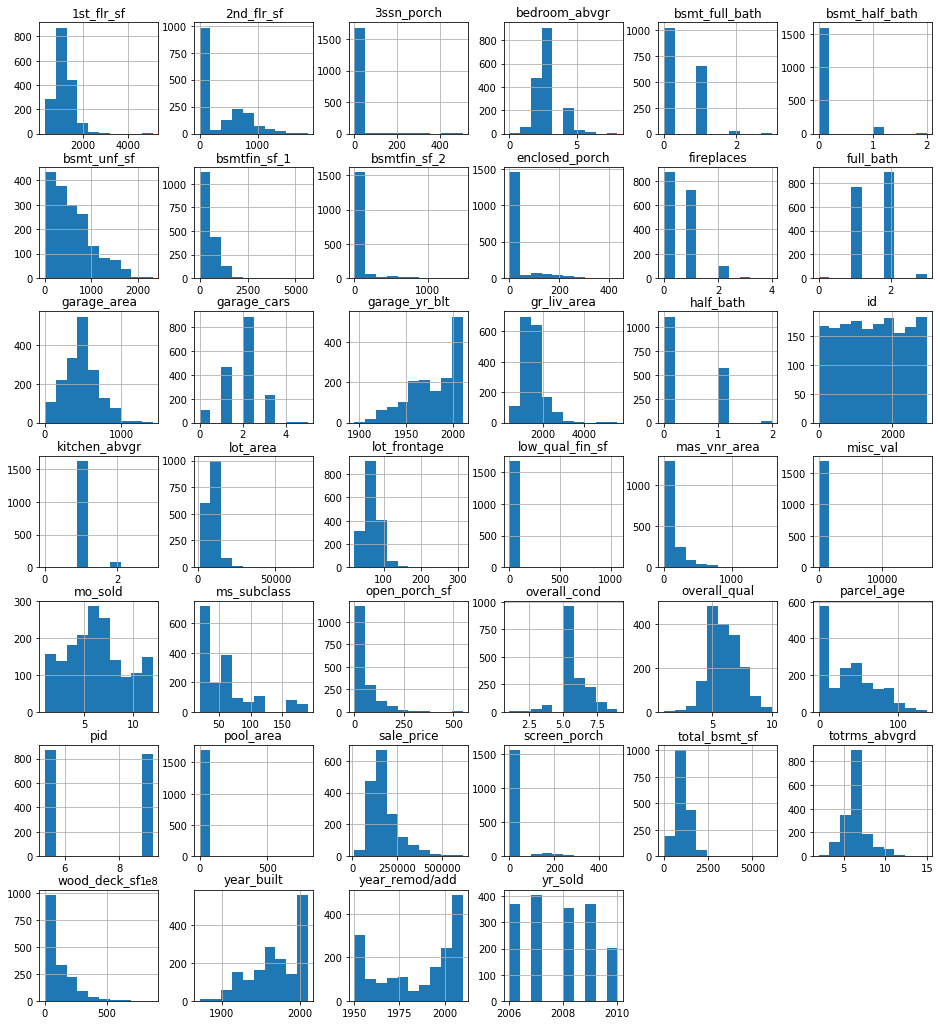

In [37]:
# Dist plots of all numeric:
train_df.hist(figsize=(16, 18));

### Boxplots: Checking for outliers

***Overall Quality of the House***
- One outlier on the left/ min side

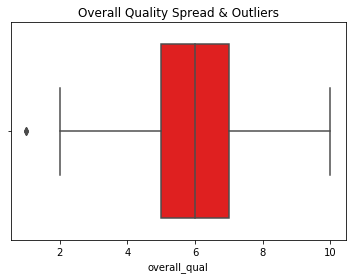

In [38]:
sns.boxplot(train_df["overall_qual"],
            color="red")

plt.title("Overall Quality Spread & Outliers");

In [39]:
# Outliers:
train_df["overall_qual"].min()

1

In [40]:
train_df["overall_qual"].describe()

count    1702.000000
mean        6.099295
std         1.456042
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

***Above Ground Living Area***
- Many outliers on the right.

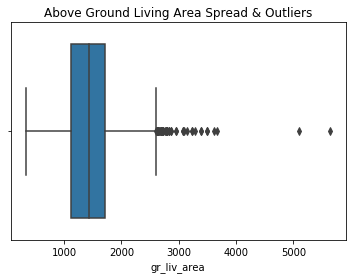

In [41]:
sns.boxplot(train_df["gr_liv_area"])

plt.title("Above Ground Living Area Spread & Outliers");

In [42]:
train_df["gr_liv_area"].describe()

count    1702.000000
mean     1481.686251
std       496.905733
min       334.000000
25%      1121.000000
50%      1432.000000
75%      1716.000000
max      5642.000000
Name: gr_liv_area, dtype: float64

***1 Floot Square Feet***
- Many outliers on the right of the plot

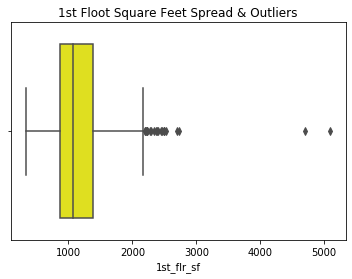

In [43]:
sns.boxplot(train_df["1st_flr_sf"],
            color="yellow")
plt.title("1st Floot Square Feet Spread & Outliers");

In [44]:
train_df["1st_flr_sf"].describe()

count    1702.000000
mean     1151.513514
std       395.733437
min       334.000000
25%       866.000000
50%      1074.000000
75%      1388.500000
max      5095.000000
Name: 1st_flr_sf, dtype: float64

***Garage Area***
- No outliers, all data explained in the boxplot above

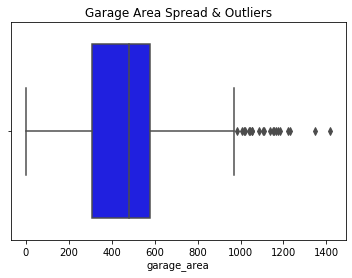

In [45]:
sns.boxplot(train_df["garage_area"],
            color="blue")

plt.title("Garage Area Spread & Outliers");

In [46]:
train_df["garage_area"].describe()

count    1702.000000
mean      467.314924
std       222.939587
min         0.000000
25%       308.000000
50%       478.000000
75%       576.000000
max      1418.000000
Name: garage_area, dtype: float64

***Total BSMT Sq Feet***

Text(0.5, 1.0, 'Total Sq Feet of Basement')

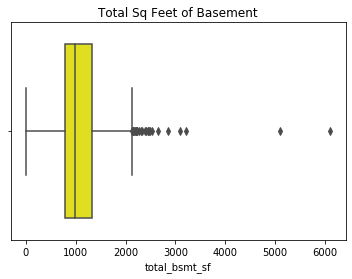

In [47]:
sns.boxplot(train_df["total_bsmt_sf"],
            color="yellow")

plt.title("Total Sq Feet of Basement")

In [48]:
train_df["total_bsmt_sf"].describe()

count    1702.000000
mean     1054.331375
std       458.092191
min         0.000000
25%       780.000000
50%       988.000000
75%      1316.750000
max      6110.000000
Name: total_bsmt_sf, dtype: float64

***Parcel Age***

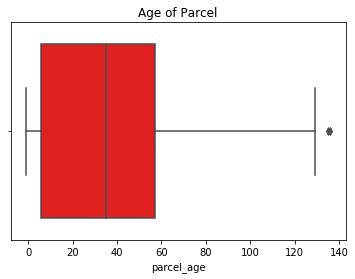

In [49]:
sns.boxplot(train_df["parcel_age"],
            color="red")

plt.title("Age of Parcel");

In [63]:
train_df["parcel_age"].describe()  # a -1 for age min? Need to be investigate.

KeyError: 'parcel_age'

# Evaluate Model on Train Data

***Note***

Although this model will be tested on a 'unknown' dataset, it will be useful to check performance of the model from predictions on the train dataset as well.

In [104]:
X = train_df[["overall_qual", 
              "gr_liv_area", 
              "1st_flr_sf", 
              "garage_area", 
              "total_bsmt_sf", 
              "parcel_age"]]
features = list(X.columns)
y = train_df["sale_price"]

***Instantiate***

In [118]:
lr = LinearRegression()

***Fit***

In [119]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
print(lr.coef_)
print(lr.intercept_)

[ 2.16895827e+04  4.48327895e+01  1.62634700e+01  5.12499817e+01
  1.75918724e+01 -3.36105146e+02]
-68021.0382816261


***Train/Test Split***

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [121]:
# train score
lr.score(X_train, y_train)

0.7733238802542367

In [122]:
# test score
lr.score(X_test, y_test)

0.8254254006363252

In [123]:
# cross val score
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.759964664224895

## Residuals Plot

In [124]:
preds = lr.predict(X_test)

In [127]:
resids = y_test - preds

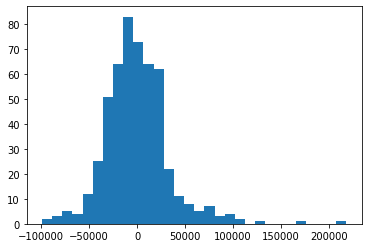

In [131]:
plt.hist(resids, bins=30);

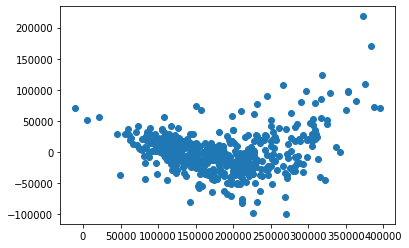

In [132]:
plt.scatter(preds, resids)

### Linearity is possibly violated
- Due to the U-shape indicates that the model is only good for part of the data.

### RMSE

In [140]:
print(f"RMSE = {np.sqrt(metrics.mean_squared_error(y_test, preds))}")

RMSE = 33321.01583303932


In [141]:
# Could be effected by outliers.
# Need to check the scale of Y.

### R2

In [145]:
lr.score(X, y)

0.7865437016113264

In [146]:
X.columns

Index(['overall_qual', 'gr_liv_area', '1st_flr_sf', 'garage_area',
       'total_bsmt_sf', 'parcel_age'],
      dtype='object')

In [147]:
# 78.65% of variation in the sale price of a unit/parcel can be explained by
# the overall_qual, gr_liv_area, 1st_flr_sf, garage_area, total_bsmt_sf, and parcel_age variables

# 1st Kaggle Model: 

***Create features X and y:***

In [142]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
preds = lr.predict(test_df[features])

In [81]:
to_submit = pd.DataFrame()

In [84]:
to_submit["Id"] = test_df["id"]
to_submit["SalePrice"] = preds

In [85]:
to_submit.head()

,Id,SalePrice
0,2658,172432.281744
1,2718,212115.657499
2,2414,196327.041347
3,1989,113256.847847
4,625,182202.316589


In [86]:
to_submit.to_csv("../datasets/to_submit.csv", index=False)

## Kaggle RMSE Score:

In [97]:
# 37430.04344